In [3]:
import pandas as pd
import json, requests

# ローカルPCのデータ

## 心理学実験データの例（csvやExcel、2次元状）

In [13]:
# 読み込み
psy = pd.read_csv("data/psy_data.csv",index_col=0)

#なお、MAAS,DDFSは心理尺度です。
#Mindful Attention Awareness Scale（日本語版、藤野・梶村・野村2015、日本パーソナリティ心理学会）
#Daydream Frequency Scale（日本語版、梶村・野村2016、心理学研究）

In [14]:
display(psy)

,MAAS1,MAAS2,MAAS3,MAAS4,MAAS5,MAAS6,MAAS7,MAAS8,MAAS9,MAAS10,...,DDFS4,DDFS5,DDFS6,DDFS7,DDFS8,BIG5勤勉性,BIG5協調性,BIG5外向性,BIG5神経性傾向,BIG5開放性
0,1,1,4,2,1,1,1,1,3,2,...,4,3,3,3,3,8,11,5,7,8
1,1,6,4,4,4,1,6,1,6,6,...,2,3,3,2,2,10,8,12,2,14
2,5,4,5,2,2,4,2,2,3,3,...,2,3,2,4,2,8,9,7,5,12
3,3,3,3,2,3,3,2,2,3,2,...,5,5,1,3,2,10,9,9,5,7
4,2,1,4,3,4,4,5,4,5,5,...,3,4,4,3,3,7,13,7,11,5
5,2,4,2,3,3,2,5,4,3,4,...,4,3,3,4,2,4,12,5,9,11
6,4,5,5,5,3,5,5,5,5,5,...,5,5,5,5,5,4,5,8,11,7
7,2,1,5,2,1,4,2,3,2,3,...,2,2,2,3,2,2,9,6,5,10
8,2,3,3,4,3,4,4,4,3,3,...,2,2,2,3,2,10,9,9,8,5
9,2,1,3,3,2,5,1,2,1,4,...,1,1,2,1,1,8,9,9,6,8


In [15]:
psy.keys()

Index(['MAAS1', 'MAAS2', 'MAAS3', 'MAAS4', 'MAAS5', 'MAAS6', 'MAAS7', 'MAAS8',
       'MAAS9', 'MAAS10', 'MAAS11', 'MAAS12', 'MAAS13', 'MAAS14', 'MAAS15',
       'DDFS1', 'DDFS2', 'DDFS3', 'DDFS4', 'DDFS5', 'DDFS6', 'DDFS7', 'DDFS8',
       'BIG5勤勉性', 'BIG5協調性', 'BIG5外向性', 'BIG5神経性傾向', 'BIG5開放性'],
      dtype='object')

In [16]:
psy

,MAAS1,MAAS2,MAAS3,MAAS4,MAAS5,MAAS6,MAAS7,MAAS8,MAAS9,MAAS10,...,DDFS4,DDFS5,DDFS6,DDFS7,DDFS8,BIG5勤勉性,BIG5協調性,BIG5外向性,BIG5神経性傾向,BIG5開放性
0,1,1,4,2,1,1,1,1,3,2,...,4,3,3,3,3,8,11,5,7,8
1,1,6,4,4,4,1,6,1,6,6,...,2,3,3,2,2,10,8,12,2,14
2,5,4,5,2,2,4,2,2,3,3,...,2,3,2,4,2,8,9,7,5,12
3,3,3,3,2,3,3,2,2,3,2,...,5,5,1,3,2,10,9,9,5,7
4,2,1,4,3,4,4,5,4,5,5,...,3,4,4,3,3,7,13,7,11,5
5,2,4,2,3,3,2,5,4,3,4,...,4,3,3,4,2,4,12,5,9,11
6,4,5,5,5,3,5,5,5,5,5,...,5,5,5,5,5,4,5,8,11,7
7,2,1,5,2,1,4,2,3,2,3,...,2,2,2,3,2,2,9,6,5,10
8,2,3,3,4,3,4,4,4,3,3,...,2,2,2,3,2,10,9,9,8,5
9,2,1,3,3,2,5,1,2,1,4,...,1,1,2,1,1,8,9,9,6,8


In [17]:
psy["MAAS1"]+psy["MAAS2"]

0      2
1      7
2      9
3      6
4      3
5      6
6      9
7      3
8      5
9      3
10     5
11     9
12     8
13     5
14     4
15     5
16    11
17     9
18     5
19     5
20     6
21     6
22     8
23     6
24     8
25     5
26     9
27     9
28     6
29     8
30     6
31     5
32     4
33     9
34     2
35     6
36     6
37     5
38     7
39     8
40     8
41     9
42     9
43     6
44     6
45     5
46     8
47     6
48     7
49     5
dtype: int64

In [18]:
psy[["MAAS1","MAAS2"]]

,MAAS1,MAAS2
0,1,1
1,1,6
2,5,4
3,3,3
4,2,1
5,2,4
6,4,5
7,2,1
8,2,3
9,2,1


In [19]:
psy[["MAAS"+str(k) for k in range(1,16)]].sum(axis=1)

0     24
1     49
2     43
3     31
4     57
5     49
6     70
7     36
8     50
9     33
10    51
11    55
12    60
13    39
14    45
15    49
16    59
17    55
18    50
19    34
20    37
21    46
22    56
23    53
24    48
25    34
26    63
27    51
28    51
29    56
30    52
31    45
32    31
33    60
34    37
35    52
36    34
37    44
38    43
39    58
40    62
41    47
42    62
43    54
44    41
45    41
46    52
47    47
48    48
49    49
dtype: int64

In [20]:
psy[[k for k in psy if "MAAS" in k]]

,MAAS1,MAAS2,MAAS3,MAAS4,MAAS5,MAAS6,MAAS7,MAAS8,MAAS9,MAAS10,MAAS11,MAAS12,MAAS13,MAAS14,MAAS15
0,1,1,4,2,1,1,1,1,3,2,3,1,1,1,1
1,1,6,4,4,4,1,6,1,6,6,1,1,6,1,1
2,5,4,5,2,2,4,2,2,3,3,4,1,2,2,2
3,3,3,3,2,3,3,2,2,3,2,1,1,1,1,1
4,2,1,4,3,4,4,5,4,5,5,4,5,5,5,1
5,2,4,2,3,3,2,5,4,3,4,4,4,4,4,1
6,4,5,5,5,3,5,5,5,5,5,5,5,5,5,3
7,2,1,5,2,1,4,2,3,2,3,2,1,3,4,1
8,2,3,3,4,3,4,4,4,3,3,3,2,4,4,4
9,2,1,3,3,2,5,1,2,1,4,2,1,4,1,1


In [21]:
psy[[k for k in psy if "MAAS" in k]].sum(axis=1)

0     24
1     49
2     43
3     31
4     57
5     49
6     70
7     36
8     50
9     33
10    51
11    55
12    60
13    39
14    45
15    49
16    59
17    55
18    50
19    34
20    37
21    46
22    56
23    53
24    48
25    34
26    63
27    51
28    51
29    56
30    52
31    45
32    31
33    60
34    37
35    52
36    34
37    44
38    43
39    58
40    62
41    47
42    62
43    54
44    41
45    41
46    52
47    47
48    48
49    49
dtype: int64

In [22]:
MAAS = psy[[k for k in psy if "MAAS" in k]].sum(axis=1)
DDFS = psy[[k for k in psy if "DDFS" in k]].sum(axis=1)

In [ ]:
#Excelでも読めます
psy_ = pd.read_excel("data/psy_data.xlsx", sheet_name=None)###シートを全部読み込む

In [ ]:
psy_

In [ ]:
###何も指定しないと、最初のシートだけを読む
psy_ = pd.read_excel("data/psy_data.xlsx")

In [ ]:
psy_

## 学習データの例（json、多次元状）

In [4]:
# 読み込み
learn = json.load(open("data/learn.json"))

In [5]:
type(learn)

list

In [6]:
len(learn)

12167

In [7]:
learn[1]

{'active': True,
 'client': {'$oid': '5c1df6770336243a445524bf'},
 'statement': {'operation_name': 'ADD MARKER',
  'description': '',
  'marker_color': 'rgb(255,255,0)',
  'marker_position': '390,669,206,5,1248,882',
  'contents_id': '49182f81e6a13cf5eaa496d51fea6406',
  'contents_name': 'マニュアル学生用',
  'page_no': '2'},
 'timestamp': '2020-12-10T12:47:10.000Z',
 'id': '018c3544-852b-4818-8f67-3e56242ab558'}

In [8]:
clients = [ll['client']['$oid'] for ll in learn]
operation_name = [ll['statement']['operation_name'] for ll in learn]
marker_colors = [ll['statement']['marker_color'] for ll in learn]
contents_names = [ll['statement']['contents_name'] for ll in learn]

In [9]:
##どんな種類があるかを表示するだけ
set(clients), set(operation_name), set(marker_colors), set(contents_names)

({'5c1df6770336243a445524bf'},
 {'ADD MARKER', 'DELETE MARKER'},
 {'rgb(255,0,0)', 'rgb(255,255,0)'},
 {'セキュリティポリシーについて',
  'テストのあり方について',
  'マニュアル学生用',
  '初等中等教育のあり方について',
  '大学のあり方について',
  '教育の情報化について',
  '未来の教育・全体',
  '未来の教育・学生群１',
  '未来の教育・学生群２',
  '未来の教育・項目別',
  '通信制教育について',
  '高等学校教育のあり方について',
  '高等教育の質について'})

In [10]:
# 回数を数える
for client_ in set(clients):
    print(client_, clients.count(client_))

5c1df6770336243a445524bf 12167


In [11]:
# 回数を数えるプログラムにしてしまう
def count_ii(lists):
    for ii_ in set(lists):
        print(ii_, lists.count(ii_))

In [12]:
count_ii(operation_name)

DELETE MARKER 1026
ADD MARKER 11141


# グラフ表示

In [23]:
#必要なモジュールのインポート
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import json, requests

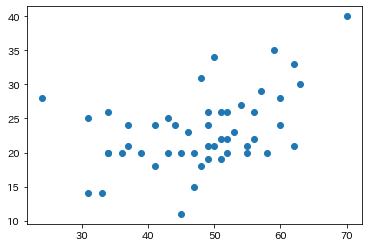

In [24]:
# MAAS,DDFSを散布図にしてみる
plt.scatter(MAAS,DDFS)
plt.show()

(array([ 1.,  3.,  6.,  3.,  6., 13.,  9.,  5.,  3.,  1.]),
 array([24. , 28.6, 33.2, 37.8, 42.4, 47. , 51.6, 56.2, 60.8, 65.4, 70. ]),
 <BarContainer object of 10 artists>)

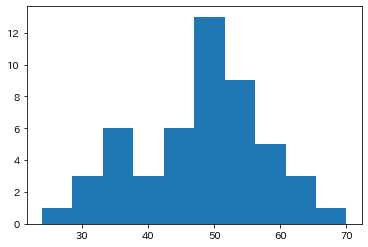

In [28]:
plt.hist(MAAS)